1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
#Display summary statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
# check for missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

there is no missing values

In [6]:
#visualization
target=df['Price']
target


0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [7]:
features= df.drop(columns='Price')
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,70,16916,Petrol,86,0,1300,3,4,5,1015


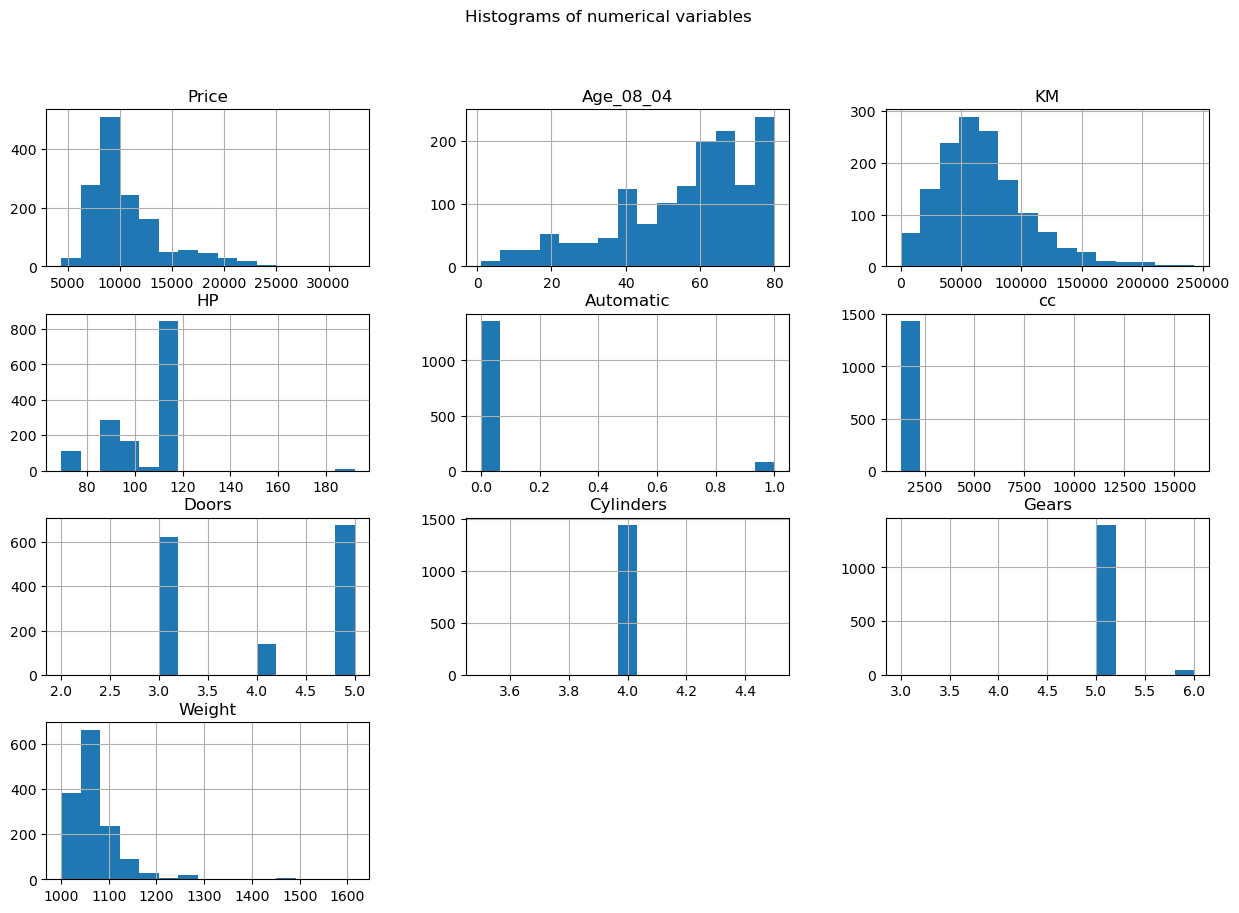

In [8]:
#visualization
#histogram for each numerical variable
df.hist(bins=15 , figsize=(15,10))
plt.suptitle("Histograms of numerical variables")
plt.show()

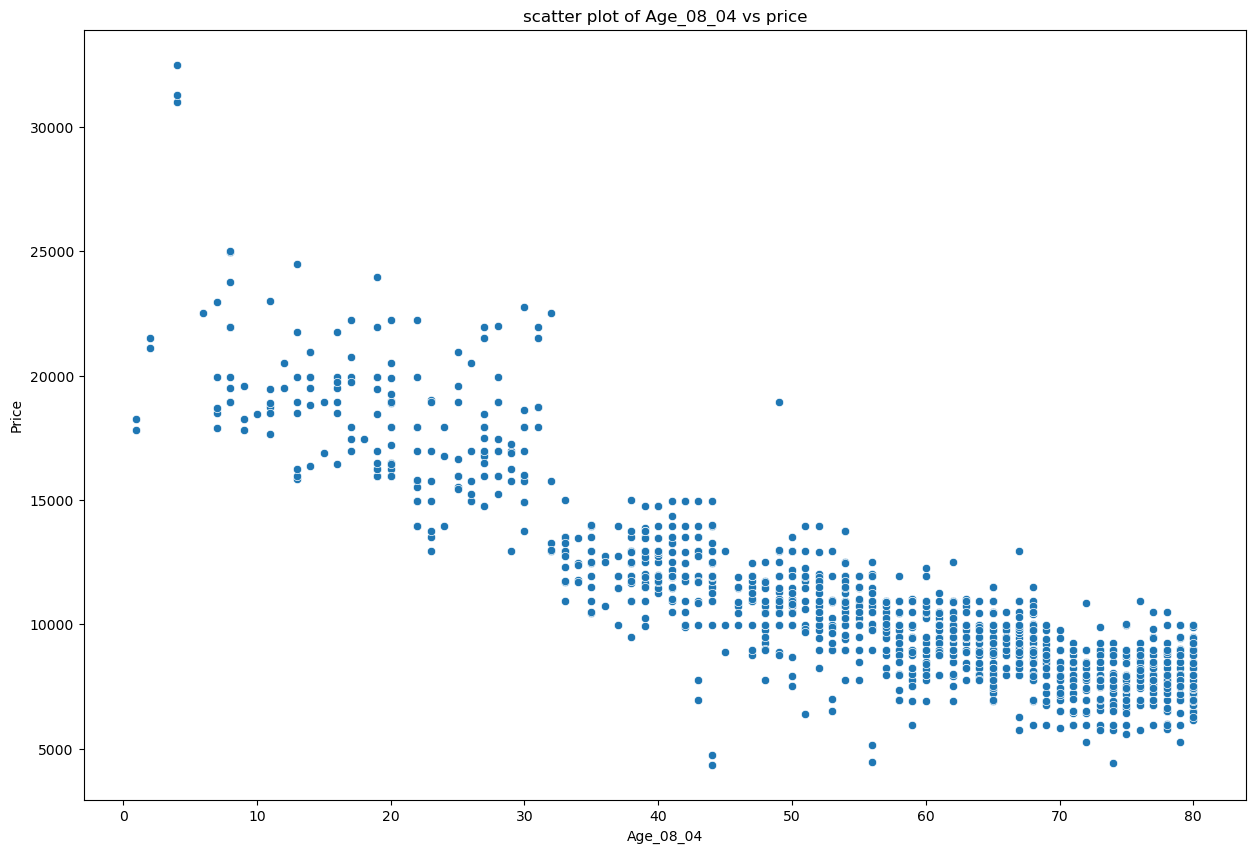

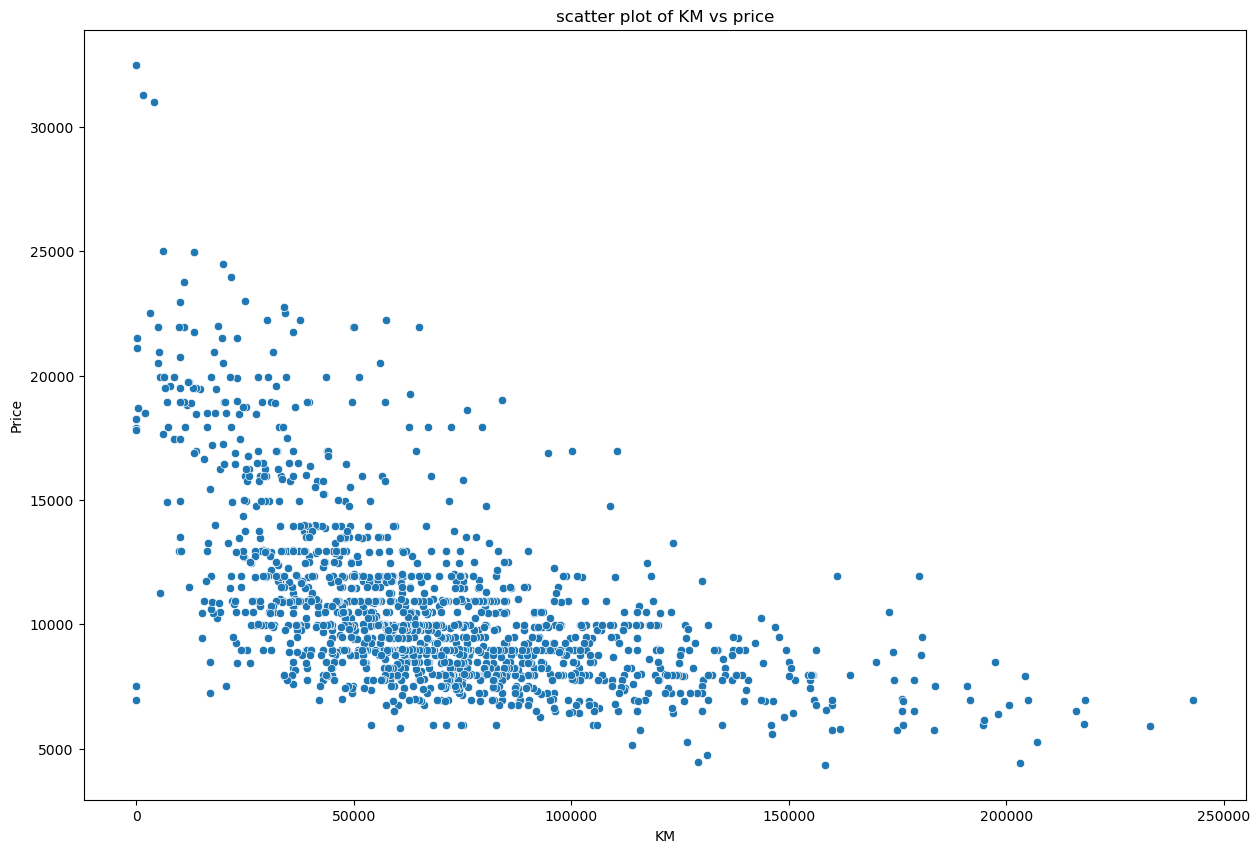

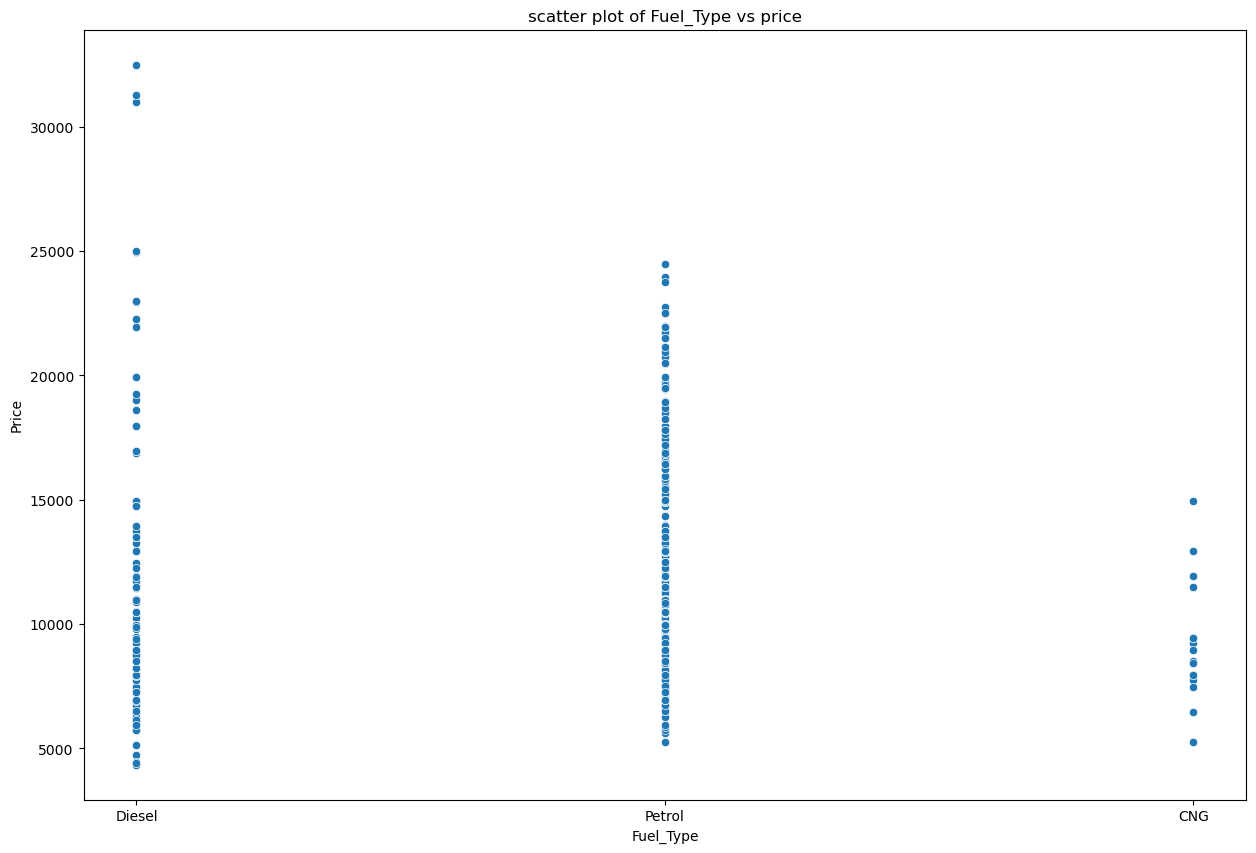

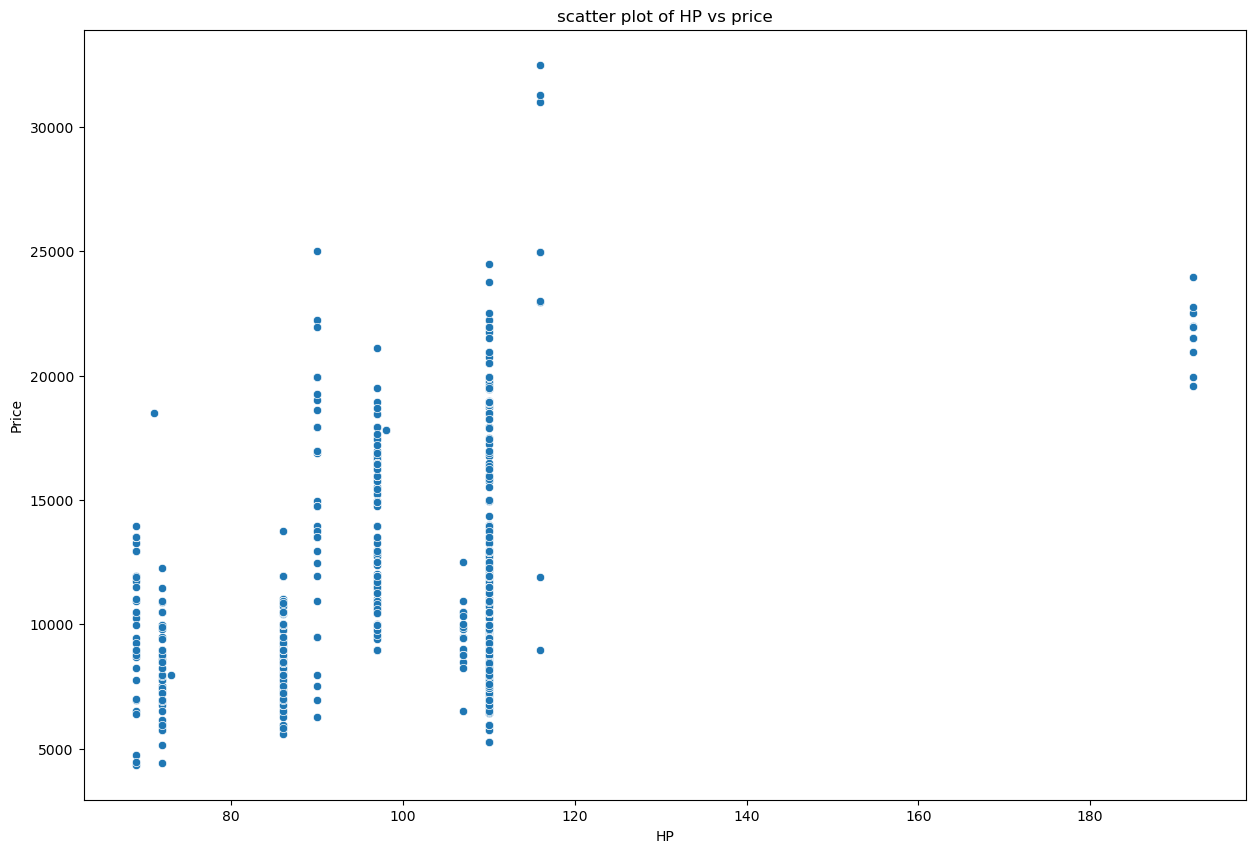

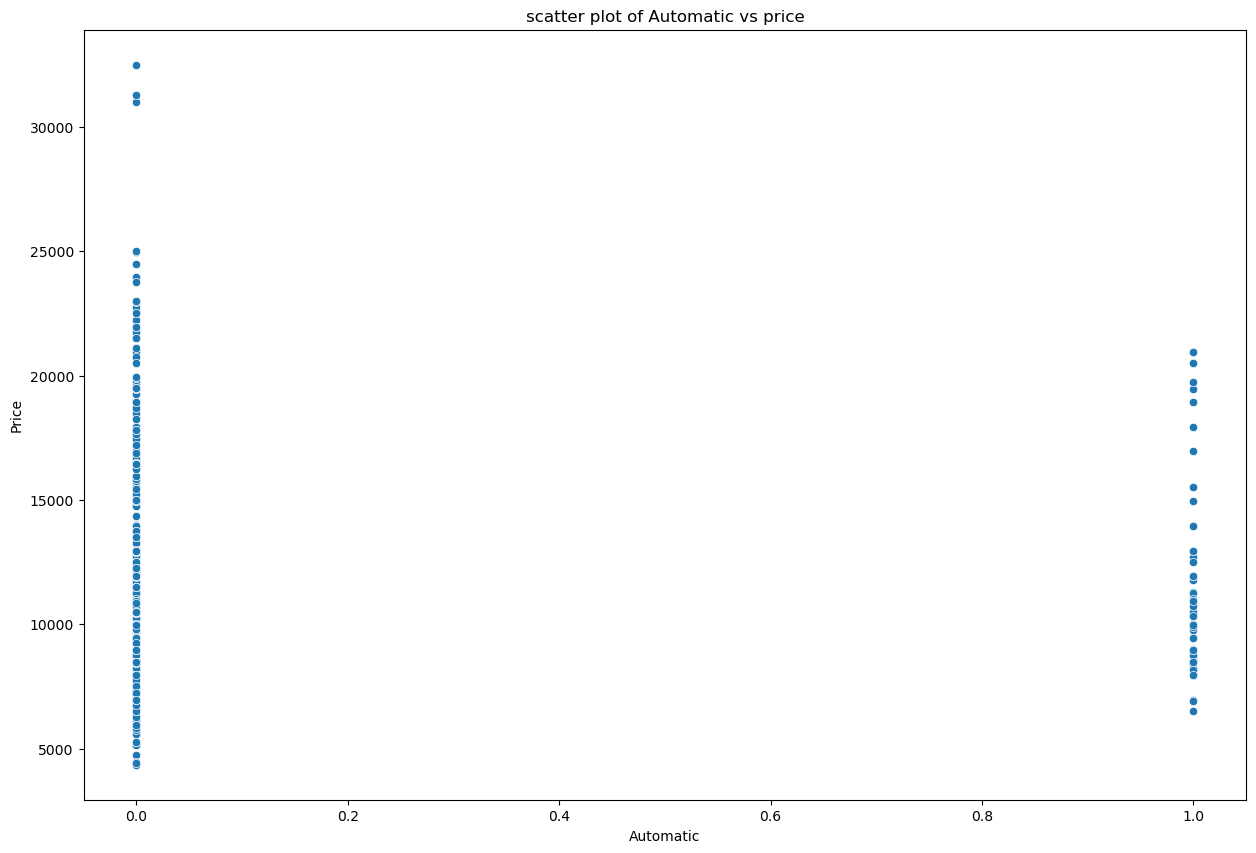

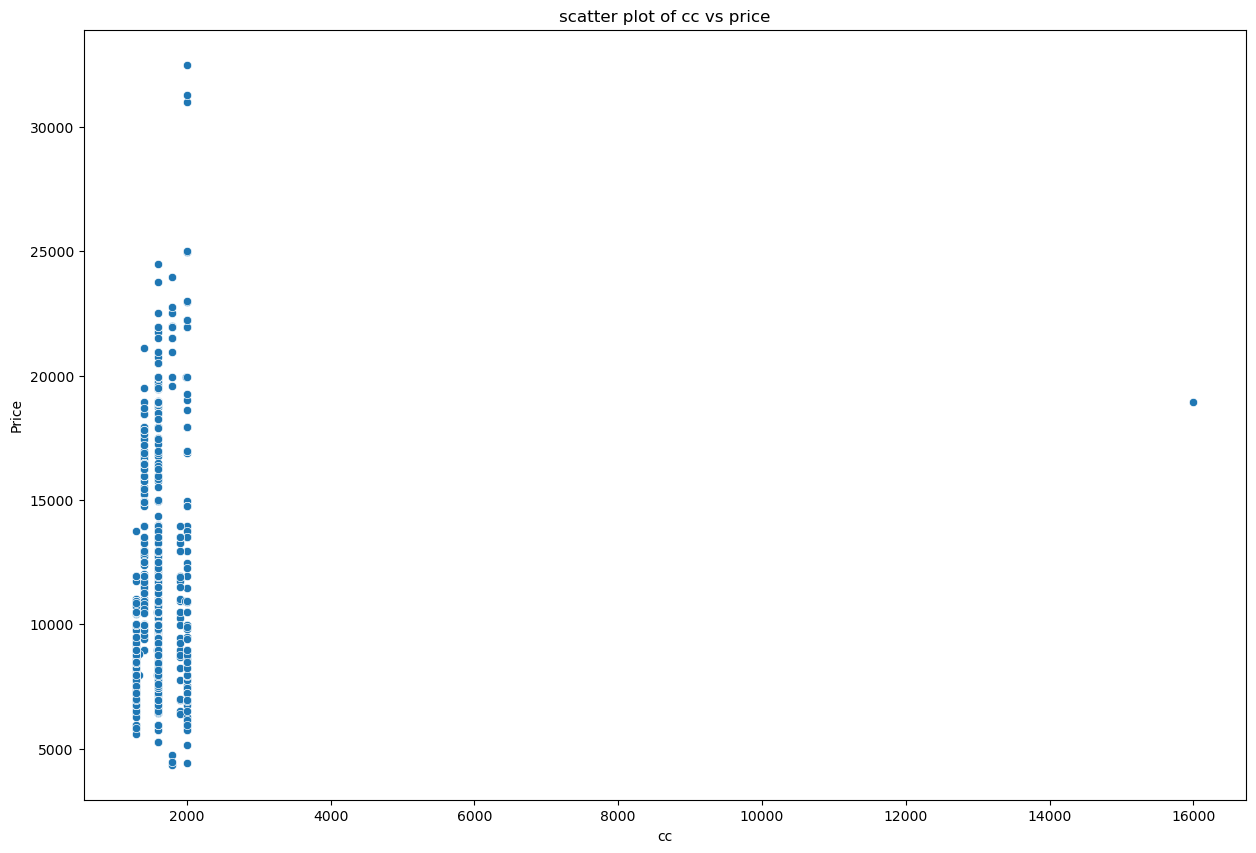

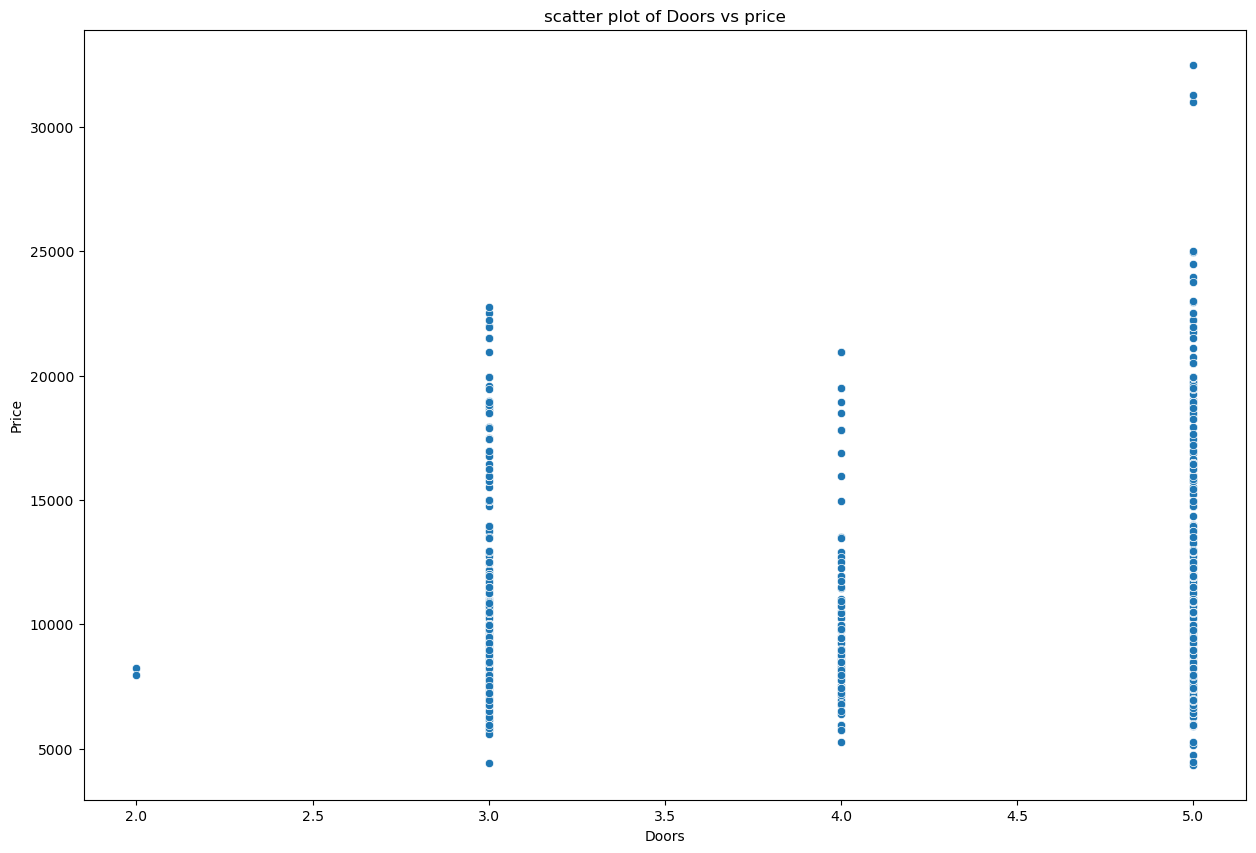

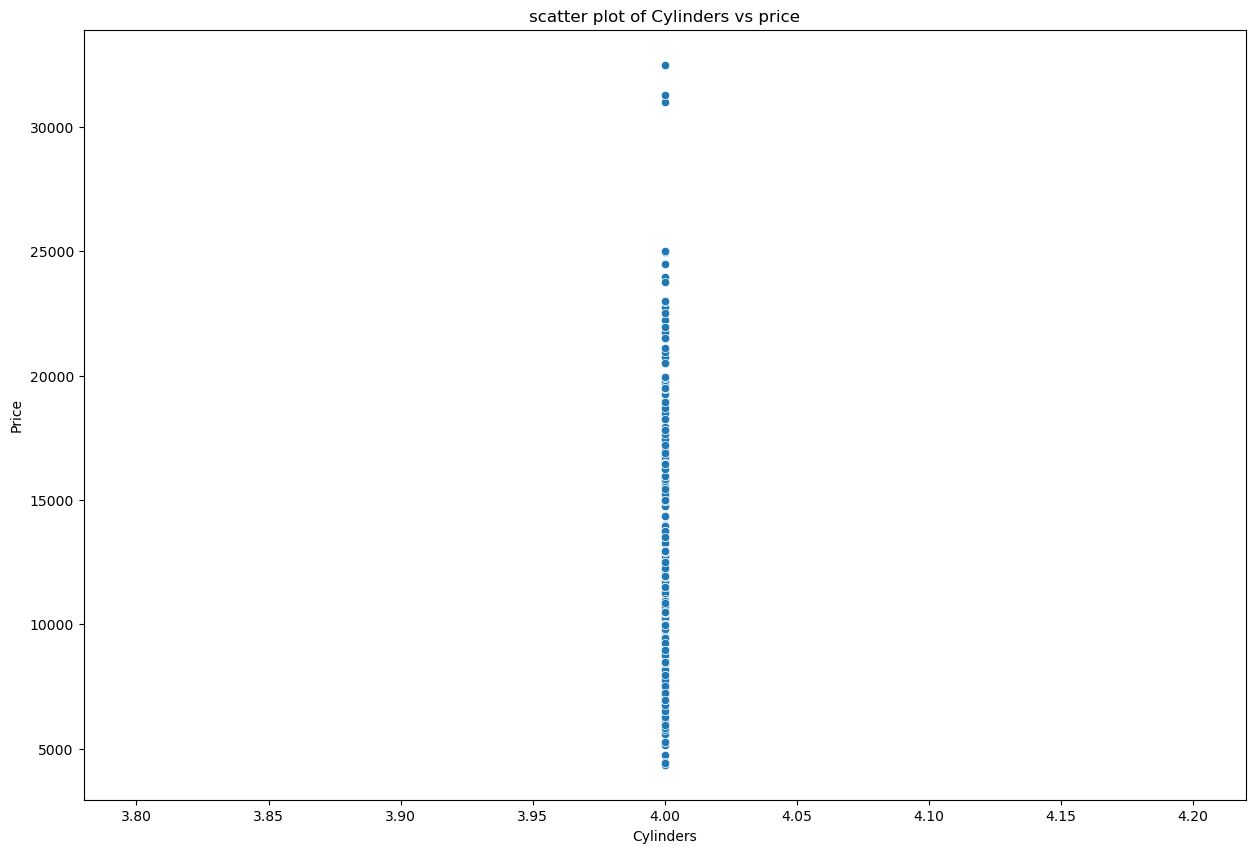

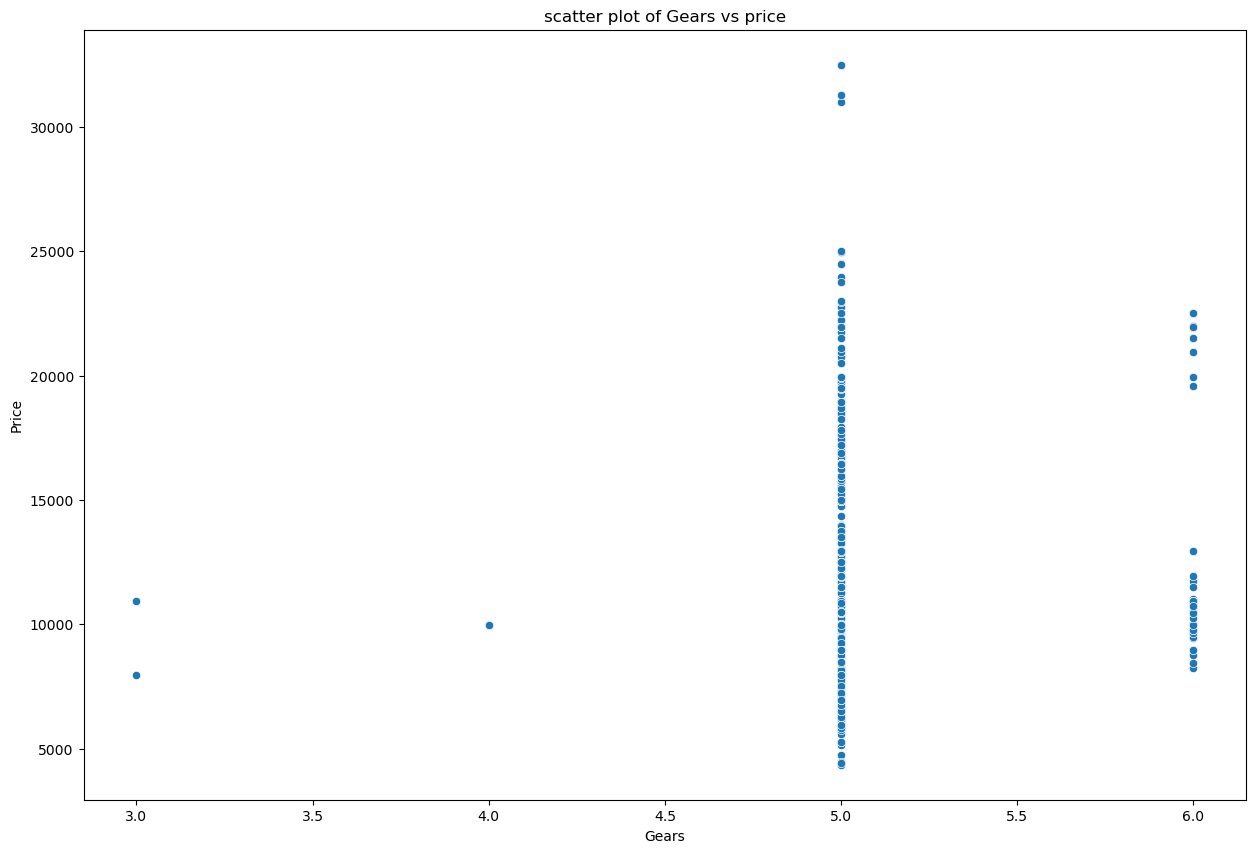

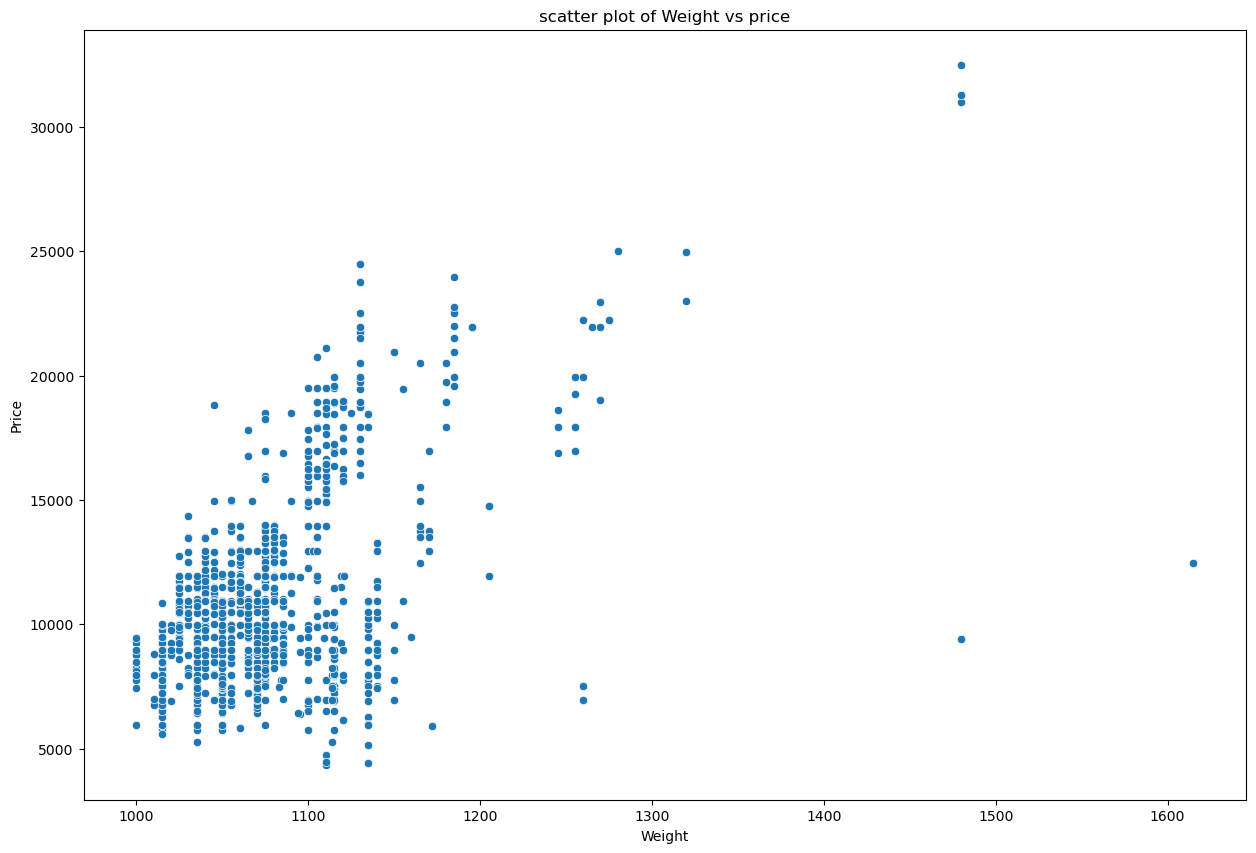

In [9]:
# scatter plot for target variable
for feature in features.columns:
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=features[feature],y=target)
    plt.title(f'scatter plot of {feature} vs price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [10]:
#Encoding categorical variables
#here fuel_type is categorical column
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [11]:
df['Fuel_Type_Diesel']=df['Fuel_Type_Diesel'].astype(int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [12]:
df['Fuel_Type_Petrol']=df['Fuel_Type_Petrol'].astype(int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [13]:
#scaling
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
df[['Age_08_04','KM','HP','cc','Automatic','Doors','Cylinders','Gears','Weight']]=scaler.fit_transform(df[['Age_08_04','KM','HP','cc','Automatic','Doors','Cylinders','Gears','Weight']])

In [16]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
1,13750,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
2,13950,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
3,14950,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
4,13750,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,0,1
1432,10845,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1
1433,8500,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1
1434,7250,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.drop(columns=['Price'])
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,1,0
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,0,1
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,0,1


In [19]:
y = target
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# Model 1: All variables
lin_model1=LinearRegression()

In [23]:
lin_model1.fit(x_train,y_train)

LinearRegression()

In [24]:
print("Model 1 Coefficients:", lin_model1.coef_)

Model 1 Coefficients: [-2.24666244e+03 -6.08570564e+02  2.10253304e+02  3.41360751e+01
 -1.28850688e+01 -5.74368449e+01  1.13686838e-12  1.03946283e+02
  1.36213868e+03 -6.85487568e+01  1.37080891e+03]


In [25]:
#Model 2: Using only Age,KM and HP which maybe the most relevant features
x_train_model2 = x_train[['Age_08_04', 'KM', 'HP']]
x_test_model2 = x_test[['Age_08_04', 'KM', 'HP']]


In [26]:
lin_model2 = LinearRegression()
lin_model2.fit(x_train_model2, y_train)

LinearRegression()

In [27]:
print("Model 2 Coefficients:", lin_model2.coef_)


Model 2 Coefficients: [-2857.7522701   -424.18093009   519.24258895]


In [28]:
#Model 3 : Excluding Fuel type and Automatic
x_train_model3 =  x_train.drop(['Fuel_Type_Petrol','Fuel_Type_Diesel','Automatic'],axis=1)
x_test_model3 =  x_test.drop(['Fuel_Type_Petrol','Fuel_Type_Diesel','Automatic'],axis=1)

In [29]:
lin_model3 = LinearRegression()
lin_model3.fit(x_train_model3, y_train)

LinearRegression()

In [30]:
print("Model 3 Coefficients:", lin_model3.coef_)

Model 3 Coefficients: [-2.22891690e+03 -7.65100846e+02  4.10815207e+02 -4.25542902e+01
  1.58775495e+00 -9.80548975e-13  1.08050892e+02  1.05774375e+03]


4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
#Model 1:
y_pred1 = lin_model1.predict(x_test)

In [33]:
y_pred1

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [34]:
r2_model1 = r2_score(y_test, y_pred1)

In [35]:
r2_model1

0.834888804061108

In [36]:
mse_model1 = mean_squared_error(y_test, y_pred1, squared=False)

In [37]:
mse_model1

1484.2654153296526

In [38]:
print("Model 1 - R² Score:", r2_model1)
print("Model 1 - MSE:", mse_model1)

Model 1 - R² Score: 0.834888804061108
Model 1 - MSE: 1484.2654153296526


In [39]:
#Model 2:
y_pred2 = lin_model2.predict(x_test_model2)

In [40]:
y_pred2

array([12025.56443607,  9054.4230785 ,  8559.29955446,  8643.40792117,
        9757.91448855,  7055.60545336,  9214.545355  ,  8086.90763665,
       14756.01005332, 13230.03078474,  8908.81850737,  9298.40972813,
       13263.67959578, 14313.9130006 , 10111.18811304,  8914.47382919,
       13523.62201999, 15206.73115564,  7747.64631045,  8779.16975905,
       13893.23987383, 18190.37955416,  7612.78835391, 11224.10704429,
        7854.23174745, 15703.07201622,  9614.22798185,  7638.62705242,
       15331.01295151, 15018.82234448,  8231.93141312, 10427.85259988,
        8057.35931216, 10553.17709415, 10655.58677386,  7939.81218753,
        9515.3646517 , 10391.15415192, 16239.68194569,  9647.14033548,
       10087.93389387,  9721.42849462,  7346.09303468,  6402.3230725 ,
        7219.12285658, 16899.21289526,  9747.56515062, 10676.21376194,
        9362.01773217, 13528.9469135 , 13625.0914239 ,  6539.2490019 ,
       14708.20051583, 15679.31119238,  6817.58709631,  7342.29420543,
      

In [41]:
r2_model2 = r2_score(y_test, y_pred2)

In [42]:
r2_model2

0.8103259513824574

In [43]:
mse_model2 = mean_squared_error(y_test, y_pred2, squared=False)

In [44]:
mse_model2

1590.8427891636227

In [45]:
print("Model 2 - R² Score:", r2_model2)
print("Model 2 - MSE:", mse_model2)

Model 2 - R² Score: 0.8103259513824574
Model 2 - MSE: 1590.8427891636227


In [46]:
# Model 3:
y_pred3 = lin_model3.predict(x_test_model3)

In [47]:
y_pred3

array([11318.45366693,  8918.19677553,  9512.63411923,  8953.72855154,
       10120.39426812,  7807.42602786,  8749.82348987,  8331.35666238,
       14100.39467548, 13179.29433706,  9362.41936139,  9358.27877527,
       12982.13684034, 13085.76072622,  9722.86300364,  8262.35271923,
       12289.89434442, 17462.634178  ,  7247.3828462 ,  9198.6040035 ,
       12781.44019993, 17806.24863997,  7891.37951541, 10502.24566449,
        7384.71547391, 15983.25113871,  9588.78032281,  7208.09121218,
       15530.75844109, 14574.4327379 ,  8120.89439591,  9895.35963789,
        8526.05626621, 10104.88629364, 10289.60400957,  8009.19319859,
        8877.21712241,  9969.99120193, 16225.6497176 ,  9448.54583759,
        9895.11234799,  9548.73736696,  7872.52718903,  5304.63130155,
        6777.90405198, 17026.12304369,  9438.53253755, 10675.30794152,
        8754.8979388 , 13561.10550951, 13071.32816471,  6338.34577697,
       14722.07901304, 16194.90931901,  5896.30073632,  7708.32732247,
      

In [48]:
r2_model3 = r2_score(y_test, y_pred3)

In [49]:
r2_model3

0.8516996336517366

In [50]:
mse_model3 = mean_squared_error(y_test, y_pred3, squared=False)

In [51]:
mse_model3

1406.6771035417098

In [52]:
print("Model 3 - R² Score:", r2_model3)
print("Model 3 - MSE:", mse_model3)

Model 3 - R² Score: 0.8516996336517366
Model 3 - MSE: 1406.6771035417098


5.Apply Lasso and Ridge methods on the model.

In [53]:
from sklearn.linear_model import Lasso, Ridge

In [54]:
#Lasso Model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

Lasso()

In [55]:
y_pred_lasso = lasso_model.predict(x_test)

In [56]:
y_pred_lasso

array([11140.75960528,  8972.67121442,  9292.67707825,  8953.50729392,
       10084.1295738 ,  7955.98960599,  8660.98167842,  8255.48501913,
       14066.00919847, 13102.52737105,  9547.11693195,  9324.4410052 ,
       12921.9812976 , 12928.67726032,  9790.98462895,  8303.80597651,
       12192.35001194, 17531.75817872,  7464.0865656 ,  9149.24305806,
       12642.26196203, 17801.59193211,  7901.73431014, 10388.27251626,
        7577.67324093, 16054.85751334, 10029.22732301,  7407.66233998,
       15757.21880717, 14444.92101521,  8162.3086589 ,  9620.5630225 ,
        8511.58761733, 10098.4112071 , 10246.06121851,  8070.95805305,
        8764.87568449,  9965.5684769 , 16462.76871864,  9622.15441131,
        9830.66373796,  9503.76191733,  7889.13432095,  5689.44363807,
        6867.07155169, 17257.51979716,  9440.68945894, 10702.80882023,
        8747.54573703, 13432.73699676, 12942.83527755,  6390.63374375,
       15060.78417516, 16363.41764185,  6187.39881364,  7782.90212657,
      

In [57]:
r2_lasso = r2_score(y_test,y_pred_lasso)

In [58]:
r2_lasso

0.8356449018625332

In [59]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

In [60]:
mse_lasso

1480.8630489799189

In [61]:
print("Lasso Coefficients:")
print(lasso_model.coef_)

Lasso Coefficients:
[-2246.79529421  -611.56640028   216.6535751     34.81496654
   -12.8489363    -54.1684061      0.           103.37163308
  1350.34628903   -33.31480306  1359.73579629]


In [62]:
# Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

Ridge()

In [63]:
y_pred_ridge = ridge_model.predict(x_test)

In [64]:
y_pred_ridge

array([11141.16908704,  8972.51354551,  9284.73372226,  8952.4399412 ,
       10083.52050462,  7957.01301965,  8657.49244341,  8257.27617542,
       14060.66197665, 13100.2233689 ,  9546.79834126,  9325.40453961,
       12918.43446701, 12926.61524649,  9789.6224448 ,  8306.65354701,
       12190.11967575, 17525.61345983,  7461.7212481 ,  9148.7995781 ,
       12637.63673061, 17799.84115762,  7903.60999695, 10388.46229021,
        7578.025161  , 16054.65221997, 10032.03472664,  7405.66185792,
       15759.59458142, 14440.78150707,  8162.16879951,  9615.31616729,
        8511.29043491, 10096.81684254, 10244.93746197,  8071.7390776 ,
        8760.50554539,  9964.09537745, 16464.12524171,  9618.43884619,
        9830.39468647,  9503.54027986,  7889.03189018,  5689.40517163,
        6870.7865637 , 17256.61375432,  9439.72211172, 10700.35893758,
        8750.71829355, 13430.94080119, 12941.17018013,  6395.55358325,
       15062.02954366, 16367.71391135,  6188.40281274,  7781.91642211,
      

In [65]:
r2_ridge = r2_score(y_test,y_pred_ridge)

In [66]:
r2_ridge

0.8353255258388037

In [67]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

In [68]:
mse_ridge

1482.301162611858

In [69]:
print("Ridge Coefficients:")
print(ridge_model.coef_)

Ridge Coefficients:
[-2243.8290843   -613.51565885   212.49513871    34.77735581
   -12.86419045   -55.69848889     0.           104.78505785
  1355.94156105  -124.29303717  1289.96705184]


# Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

Ans)Normalization in data-science refers to the process of scalling numeric features to a common range,typically between 0 and 1.
The goal of normalization is to bring all the features into a similer scale,which is perticularly important for algorithms that are sensitive to the scale of the features

Standardization in data-science refers to the process of transforming data in such a way that it has mean of 0 and standard deviation of 1.
This process is also known as z-score normalization

2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans) Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. 
This can cause issues in multiple linear regression, such as unstable coefficients estimates and difficulties in interpreting the importance of individual predictors.